In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("./face_mask_detection/Training_set_face_mask.csv")
test_data = pd.read_csv("./face_mask_detection/Testing_set_face_mask.csv")

In [3]:
len(train_data)

11264

In [4]:
len(test_data)

1536

In [5]:
train_data.head()

,filename,label
0,Image_1.jpg,without_mask
1,Image_2.jpg,without_mask
2,Image_3.jpg,without_mask
3,Image_4.jpg,without_mask
4,Image_5.jpg,without_mask


In [6]:
train_data.tail()

,filename,label
11259,Image_11260.jpg,with_mask
11260,Image_11261.jpg,with_mask
11261,Image_11262.jpg,with_mask
11262,Image_11263.jpg,with_mask
11263,Image_11264.jpg,with_mask


In [7]:
test_data.head()

,filename,label
0,Image_1.jpg,NaN
1,Image_2.jpg,NaN
2,Image_3.jpg,NaN
3,Image_4.jpg,NaN
4,Image_5.jpg,NaN


In [8]:
train_data.label.value_counts()

label
without_mask    5632
with_mask       5632
Name: count, dtype: int64

In [9]:
train_data.isnull().sum()

filename    0
label       0
dtype: int64

In [10]:
print(train_data.loc[56])

filename    Image_57.jpg
label       without_mask
Name: 56, dtype: object


In [11]:
print(train_data.iloc[578])

filename    Image_579.jpg
label        without_mask
Name: 578, dtype: object


In [12]:
image_paths = ['./face_mask_detection/train/' + fname for fname in train_data['filename']]
image_paths # will get list of list of image id and image path

"""
The reason behind using the filename from train_labels is that
- it will help you to get all the images whose labels we already have in train_labels.
- It will also help to maintain the order of the images. If you notice the images ids in train_labels, they are
in some specific order, this will help you load all the images location in the list in the same order.
"""

'\nThe reason behind using the filename from train_labels is that\n- it will help you to get all the images whose labels we already have in train_labels.\n- It will also help to maintain the order of the images. If you notice the images ids in train_labels, they are\nin some specific order, this will help you load all the images location in the list in the same order.\n'

In [13]:
# Confirm if number of filepaths (i.e. images) is same as number of labels given
if len(train_data) == len(image_paths):
    print('Number of labels i.e. ', len(train_data), 'matches the number of filepaths i.e. ', len(image_paths))
else:
    print("Number of labels does not match the number of filepat")

Number of labels i.e.  11264 matches the number of filepaths i.e.  11264


In [14]:
train_data.head()

,filename,label
0,Image_1.jpg,without_mask
1,Image_2.jpg,without_mask
2,Image_3.jpg,without_mask
3,Image_4.jpg,without_mask
4,Image_5.jpg,without_mask


In [15]:
train_data = pd.DataFrame({'filename': train_data['filename'], 'filepath': image_paths, 'label': train_data['label']})
train_data.head()

,filename,filepath,label
0,Image_1.jpg,./face_mask_detection/train/Image_1.jpg,without_mask
1,Image_2.jpg,./face_mask_detection/train/Image_2.jpg,without_mask
2,Image_3.jpg,./face_mask_detection/train/Image_3.jpg,without_mask
3,Image_4.jpg,./face_mask_detection/train/Image_4.jpg,without_mask
4,Image_5.jpg,./face_mask_detection/train/Image_5.jpg,without_mask


In [16]:
print(train_data.iloc[578])

filename                                Image_579.jpg
filepath    ./face_mask_detection/train/Image_579.jpg
label                                    without_mask
Name: 578, dtype: object


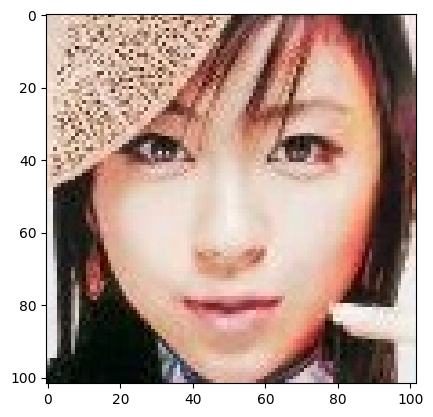

In [17]:
# to display the image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

img = cv2.imread(train_data.iloc[578]['filepath'],cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [18]:
print(train_data.iloc[578])

filename                                Image_579.jpg
filepath    ./face_mask_detection/train/Image_579.jpg
label                                    without_mask
Name: 578, dtype: object


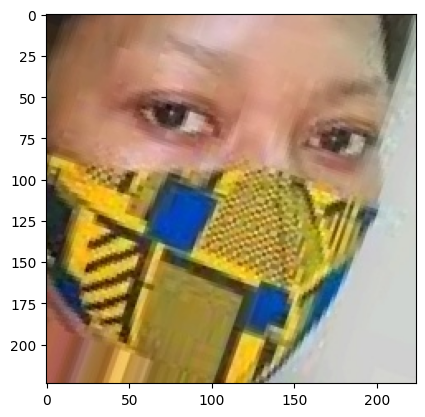

In [19]:
# to display the image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

img = cv2.imread(train_data.iloc[11263]['filepath'],cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [20]:
print(train_data.iloc[11263])

filename                                Image_11264.jpg
filepath    ./face_mask_detection/train/Image_11264.jpg
label                                         with_mask
Name: 11263, dtype: object


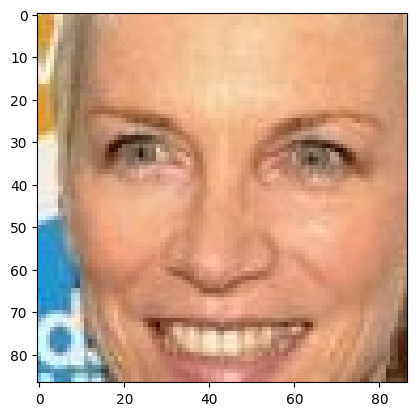

In [21]:
img2 = cv2.imread(train_data.iloc[40]["filepath"], cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)



In [22]:
print(train_data.iloc[40])

filename                                Image_41.jpg
filepath    ./face_mask_detection/train/Image_41.jpg
label                                   without_mask
Name: 40, dtype: object


In [23]:
print(train_data.iloc[578]['label'])

without_mask


In [24]:
print(train_data.iloc[11263]["label"])

with_mask


In [25]:
print(train_data.iloc[40]["filepath"])

./face_mask_detection/train/Image_41.jpg


In [26]:
train_data.shape

(11264, 3)

In [27]:
train_data.size

33792

### # Well we are set, but there is a trick, Machine/Deep Learning models doesn't accept images, they accepts only numbers. We need to convert these images to their pixel values so that we can apply ML/DL Models. We can achieve this using cv2 (OpenCV) library.

### ## Loading Image's Pixel Values
### OpenCV's imread method helps in reading an image and getting its pixel values. You just need to provide the path of each image inside imread().

### Finally, store the image as well as its label inside data.

In [28]:
train_data.shape

(11264, 3)

In [29]:
data = [] # initialize a list to store, each image's pixel values
labels = [] # initialize a list to store each image's labels i.e. label
target_size = (224, 224)

for i in range(len(train_data)):
    aux = cv2.imread(train_data['filepath'][i]) # for each i starting from 0, convert the ith image to array of pixels
    image_arr = cv2.cvtColor(aux,cv2.COLOR_BGR2RGB)
    image_arr = cv2.resize(image_arr, target_size)
    data.append(image_arr)
# We also need to convert the categorical values i.e. 'with_mask' and 'without_mask' to numerical
# Using conditional statement, we can do it here only. if mucca then 0, if pecora then 1
    if train_data['label'][i] == 'without_mask': # if respective image's label is without_mask
       labels.append(0)
    else: # since there are only two type 
       labels.append(1) # This indexing needs to be remembered 'without_mask' = 0 and 'with_mask' = 1, this will be required when you convert your predictions on test data to categorical value again

# data and labels are in normal python list, you must convert it to numpy array. You can do it using a single command!
data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(11264, 224, 224, 3)
(11264,)


In [30]:
print(labels)

[0 0 0 ... 1 1 1]


In [31]:
len(labels)

11264

In [32]:
len(data)

11264

## Display image using pixel values
### Using imshow from mtaplotlib.pyplot you can display an image using those pixel values

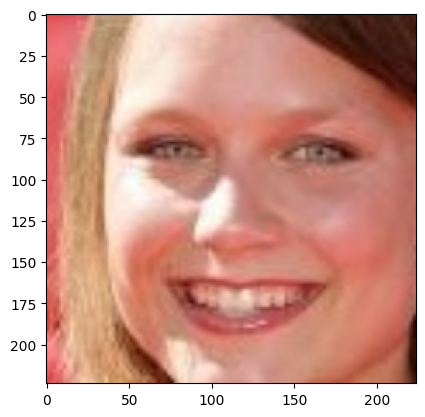

In [33]:
plt.imshow(data[0])

In [34]:
# respective labels
# label of the above image displayed
print(labels[0])

0


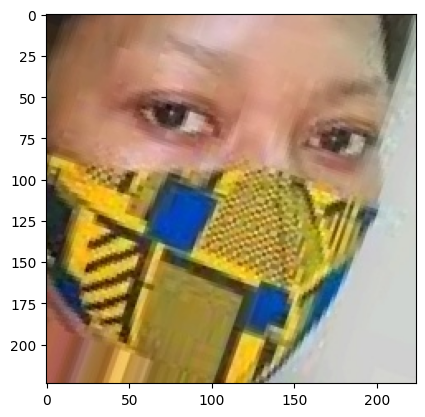

In [35]:
plt.imshow(data[11263])

In [36]:
print(labels[11263])



1


### Split the data

In [37]:
# Can split data using train_test_split
# import train_test_split
from sklearn.model_selection import train_test_split

# Assign variables to capture train test split output
trainFigures, testFigures, trainLabels, testLabels = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f'trainFigures shape = {trainFigures.shape}')
print(f'trainLabels shape = {trainLabels.shape}')
print(f'testFigures shape = {testFigures.shape}')
print(f'testLabels shape = {testLabels.shape}')

trainFigures shape = (9011, 224, 224, 3)
trainLabels shape = (9011,)
testFigures shape = (2253, 224, 224, 3)
testLabels shape = (2253,)


In [38]:
import tensorflow as tf

In [39]:
# define image size
INPUT_SHAPE = (224, 224, 3)

# define the model as sequential
model = tf.keras.models.Sequential()

# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
                                 activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
                                 activation='relu', padding='valid'))  # No need for input_shape here
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add a flattening layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))

# add output layer (for binary classification)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # sigmoid for binary classification

# visualize the model's layers
model.summary()


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,944,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,954,337 (45.60 MB)

 Trainable params: 11,954,337 (45.60 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# compilar modelo
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [44]:
EPOCHS = 100
train_images_scaled = trainFigures / 255.0
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,
restore_best_weights=True,
verbose=1)
history = model.fit(train_images_scaled, trainLabels,
batch_size=32,
callbacks=[es_callback],
validation_split=0.1, epochs=EPOCHS,
verbose=1)

MemoryError: Unable to allocate 10.1 GiB for an array with shape (9011, 224, 224, 3) and data type float64